In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data

from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [4]:
data.head()

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
0,0,1090,43,66.679,0,1,0,100,0,1,...,1,1,3,0,504,353,660,1,870,782
1,1,794,31,73.030,0,1,0,100,0,1,...,1,1,3,0,244,225,106,1,708,699
2,0,957,41,66.226,0,1,1,100,0,1,...,1,1,3,0,401,366,453,1,889,720
3,1,188,35,78.019,0,1,0,100,0,1,...,1,1,3,0,221,132,-1,0,221,759
4,1,308,40,83.009,0,1,0,100,0,1,...,1,1,3,1,150,90,20,1,1730,1160


In [5]:
Y = data['censor']
X = data.drop(columns=['censor'])

In [6]:
# PCA Fitting
pca = PCA(n_components = 20)
X_pca = pca.fit_transform(X)
print("PCA Output shape : {}".format(X_pca.shape))

PCA Output shape : (532, 20)


In [7]:
print(pca.explained_variance_)

[3.70667749e+05 2.15079584e+05 1.25850077e+05 4.94401844e+04
 2.65427579e+04 1.53772678e+04 3.72788149e+03 1.74684229e+02
 7.49561262e+01 3.40792676e+01 4.30435656e-01 3.53600862e-01
 1.54716691e-01 1.31560844e-01 1.00475447e-01 9.69612401e-02
 8.74424005e-02 6.02020237e-02 2.70624219e-02 2.29882002e-02]


In [8]:
print(pca.explained_variance_ratio_)

[4.59332351e-01 2.66527130e-01 1.55953713e-01 6.12663934e-02
 3.28918484e-02 1.90555467e-02 4.61959956e-03 2.16469110e-04
 9.28858089e-05 4.22311090e-05 5.33396883e-07 4.38183024e-07
 1.91725289e-07 1.63030509e-07 1.24509412e-07 1.20154598e-07
 1.08358829e-07 7.46024902e-08 3.35358172e-08 2.84870320e-08]


In [9]:
sum(pca.explained_variance_ratio_)

0.9999999834255522

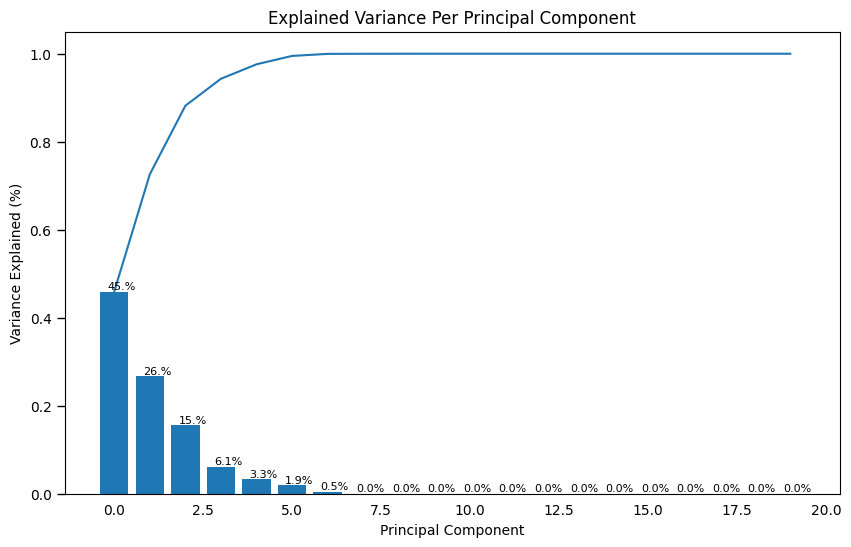

In [17]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]), 
                    va="bottom", 
                    ha="center", 
                    fontsize=8)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

In [23]:
new_coordinates = np.vstack((X_pca[:,:2].T, Y)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0    -138.883508     954.235639    0.0
1    -332.883126     582.764805    1.0
2    -162.796877     946.129985    0.0
3    -628.525758     670.525096    1.0
4     749.795431     605.104075    1.0


D:\win\Projects\test2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\win\Projects\test2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


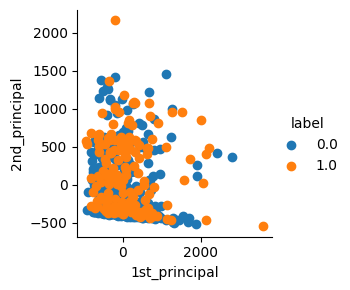

In [25]:
sns.FacetGrid(dataframe, hue="label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()